#### 1. 문제 정의(목표)
- 미국의 중심 도시인 보스턴의 1970년대 거주지에 대한 데이터를 바탕으로 주택가격을 예측해보자

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### 2. 데이터 수집
- 보스턴 집 값 데이터셋 로드

In [9]:
data = pd.read_csv('data/boston_house.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


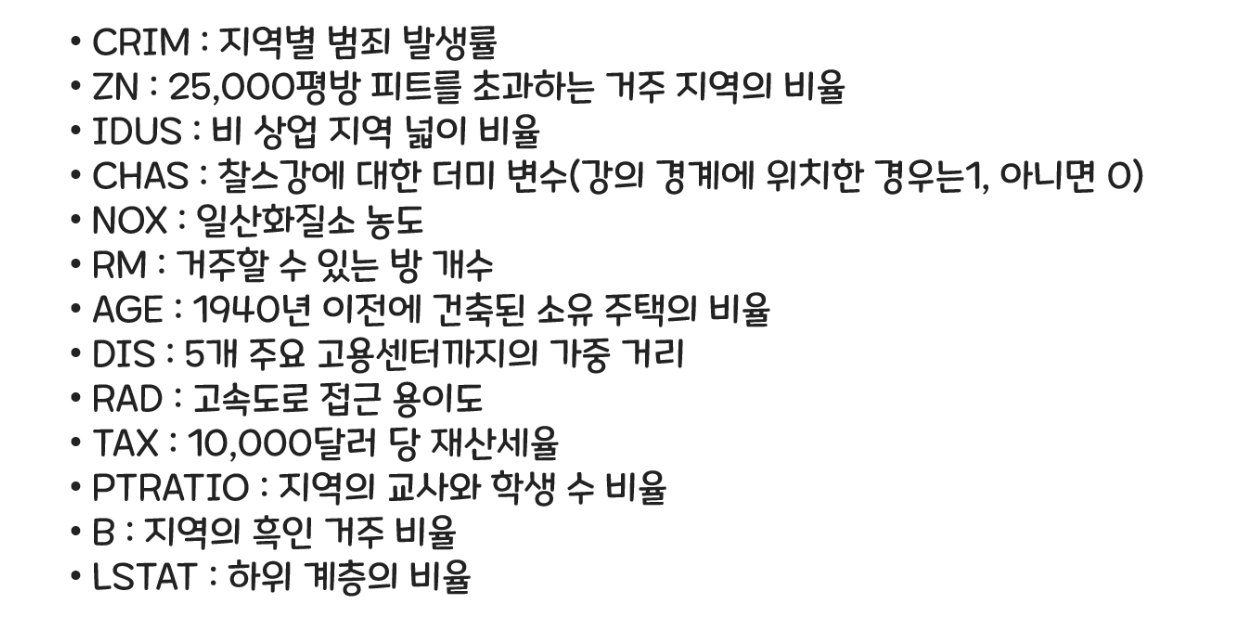

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 3. 데이터 전처리
- 필요 없음!

#### 4. 탐색적 데이터 분석

In [16]:
# 특성간 상관계수 출력
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

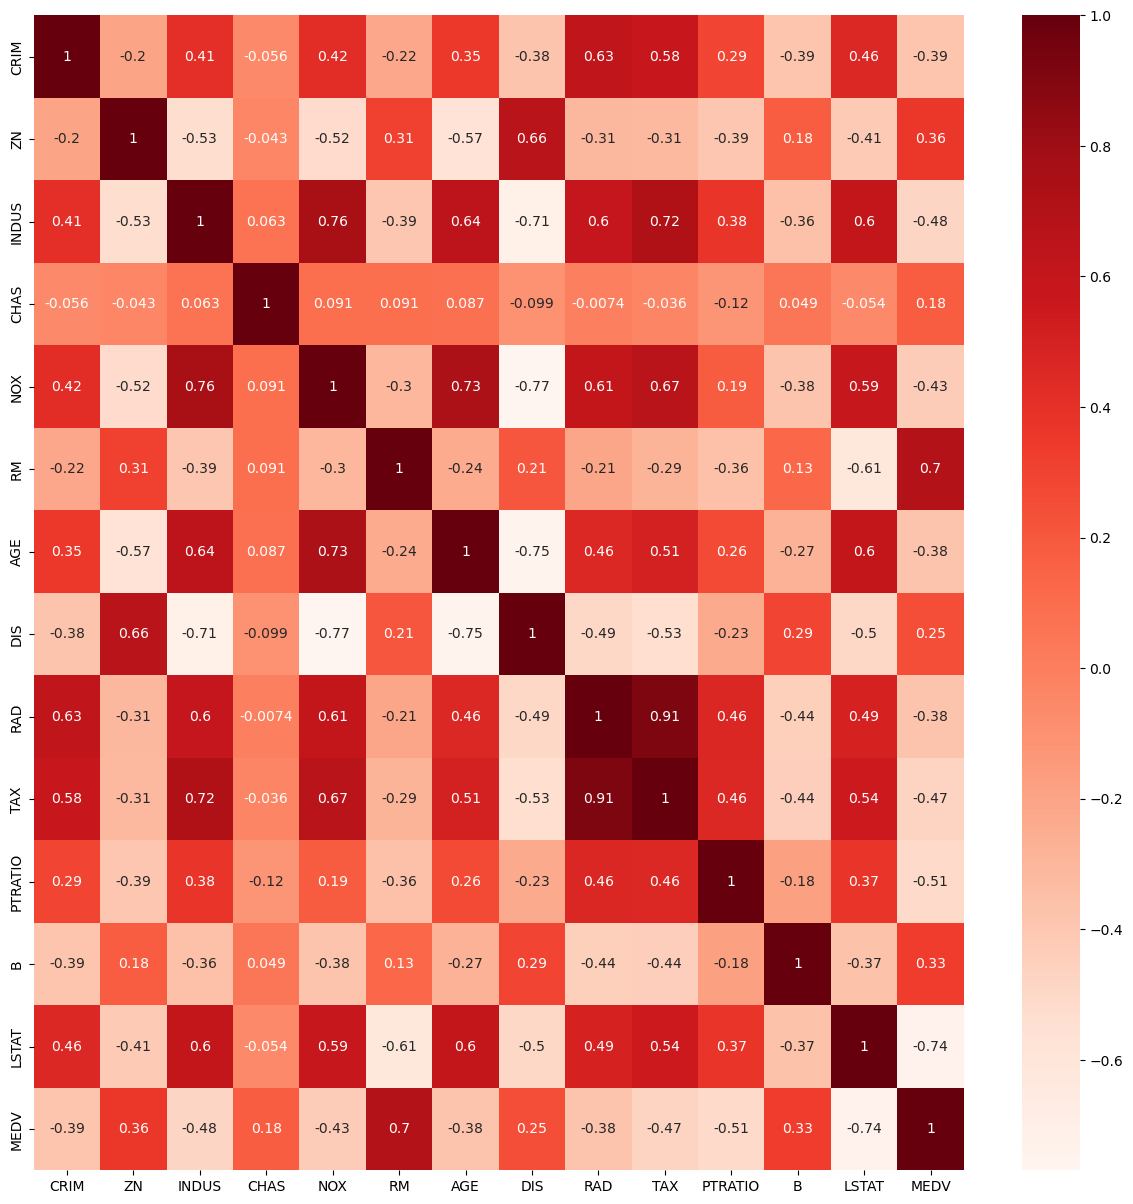

In [20]:
plt.figure(figsize = (15,15))

# 상관계수 히트맵
sns.heatmap(data = data.corr(),
           annot = True, # annotation : 각 셀에 상관계수 값 출력 여부
           
           # 히트맵 색상
            cmap = "Reds"
           )

- 데이터로만 보았을 때, 주택가격(MEDV)과의 상관관계가 높은 특성은 RM(주택당 방 개수), LATAT(소득하위계층 비율)

#### 5. 모델링(모델 선택, 학습, 평가)
- 문제, 정답 데이터 설정
- 학습, 평가 데이터 설정

In [24]:
# 먼저 문제, 정답으로 나눈 후, train_test_split으로 학습, 평가까지 분리

In [26]:
data.shape

(506, 14)

In [28]:
y = data['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [30]:
# X = data.drop('MEDV', axis = 1)
# X = data.iloc[ : , : 13]
X = data.loc[: , :'LSTAT']
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [32]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 5)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


### 선형회귀모델 적용


In [37]:
# 선형회귀모델 임포트
from sklearn.linear_model import LinearRegression

# 평가지표 MSE 임포트
from sklearn.metrics import mean_squared_error

In [39]:
linear_model = LinearRegression()

In [41]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [45]:
# w값 출력(특성 13개)
# y = w1x1 + w2x2 + w3x3 ... w13x13 + b
linear_model.coef_

array([-1.54486040e-01,  4.13948217e-02, -2.53765225e-02,  7.86055259e-01,
       -1.29365836e+01,  4.03952301e+00, -1.05354914e-02, -1.33498644e+00,
        3.18272501e-01, -1.26427463e-02, -9.77287564e-01,  1.26714702e-02,
       -4.62052176e-01])

In [47]:
# 표기법 전환
np.set_printoptions(suppress=True , precision = 4) # 지수표기법 억제, 소수점 4자리

In [49]:
linear_model.coef_

array([ -0.1545,   0.0414,  -0.0254,   0.7861, -12.9366,   4.0395,
        -0.0105,  -1.335 ,   0.3183,  -0.0126,  -0.9773,   0.0127,
        -0.4621])

In [53]:
# 데이터 프레임 생성

coef_df = pd.DataFrame({ # 데이터 프레임 만든다
    'Feature' : X_train.columns, # 컬럼명은 Featurem, 데이터는 X_train컬럼명을 쓰겠다.
    'Coefficient' : linear_model.coef_ # 컬럼명은 Coefficient, epdlxjsms linear_model.coef_로 하겠다.
    
    
})
coef_df

,Feature,Coefficient
0,CRIM,-0.154486
1,ZN,0.041395
2,INDUS,-0.025377
3,CHAS,0.786055
4,NOX,-12.936584
5,RM,4.039523
6,AGE,-0.010535
7,DIS,-1.334986
8,RAD,0.318273
9,TAX,-0.012643


- 왜 RM과 LSTAT의 가중치가 가장 크지 않을까?
- 더독립변수에 들어가는 수치의 단위가 다르다! (스케일이 다름)
- ex) NOX:일산화 질소 농도 -> 스케일이 매우 작음 -> 기울기를 크게
- ex) Age의 경우 스케일이 크기때문에 기울기를 작게
  

In [57]:
linear_model.intercept_

31.73035129649775

MSE, RMSE 확인



In [60]:
# 예측값들 저장
pre_train = linear_model.predict(X_train)
pre_test = linear_model.predict(X_test)

In [62]:
pre_test

array([37.39  , 31.5679, 27.1337,  6.5512, 33.6931,  5.5492, 27.1001,
       29.8298, 26.4462, 22.3887, 32.2474, 21.7489, 23.4237, 33.5797,
       28.3145, 15.365 ,  0.1701, 18.7086, 14.6046, 10.8026,  3.1855,
       19.3925, 38.3324, 24.4046, 31.9995, 11.352 , 24.9229, 23.3921,
       22.7507, 21.0958, 16.123 ,  7.5354, 17.598 , 22.8221, 29.2679,
       18.8053, 28.3367,  8.6047, 41.6323, 34.1975, 20.1177,  4.3099,
       29.6111, 11.9215, 27.2222, 30.9454, -6.2647, 19.9637, 21.5938,
       13.6436, 20.4985, 19.9377, 23.6538, 13.5165, 17.6443, 25.2014,
       35.3149, 15.2534, 28.51  , 21.8525, 20.6639, 26.0316, 14.7163,
       32.3465, 20.7126, 12.1691, 19.6099, 25.1948, 21.7899, 21.1727,
       20.5707, 26.6823, 17.6343, 18.5968, 18.8646, 26.1126, 21.8839,
       15.7936, 35.1229, 17.9301, 22.3741, 39.4321, 22.3586, 14.7508,
       25.5997, 17.2634, 18.6474, 10.026 , 19.7358, 17.6831, 36.1822,
       17.6844, 21.0208, 19.0402, 24.8101, 28.1227, 12.3997, 22.7785,
       21.0432, 13.3

In [64]:
pre_train

array([11.4309, 13.7185, 26.4186, 31.6866, 11.0511, 24.7729, 28.9531,
       32.2259, 15.6178, 30.3854,  9.9983, 34.6405, 25.6395, 20.2432,
       15.5414, 13.036 , 30.4522, 13.2658, 24.4609, 20.5425, 13.6812,
       21.8499, 14.1066, 18.6271, 22.1684, 33.4791, 22.3938, 16.7195,
       30.8946, 38.6076, 26.5084, 25.969 , 15.1705, 15.8474, 35.9205,
       22.7883, 33.553 , 25.2657, 20.8824, 17.1336, 23.4906, 19.8579,
       30.3236, 16.4674, 25.5273, 26.7393, 23.9351, 22.7894, 32.9337,
       18.773 , 30.8384, 28.7822, 13.3372, 32.7834, 27.6637, 19.5787,
       35.5025, 14.3487, 24.9673, 28.3706, 22.3478, 18.7344, 20.9501,
       25.0458, 19.914 , 32.3946, 23.7971, 19.401 ,  7.0189,  5.5508,
       22.3174, 19.6758, 20.9031, 21.4219, 17.661 , 31.3212, 37.6994,
       20.0529, 13.2866, 27.283 , 16.4181, 25.059 , 18.5833, 24.1286,
       14.647 , 20.553 , 13.4972, 22.0413, 27.716 , 22.9651, 17.0856,
       15.406 , 21.3564, 38.8502, 19.8867, 15.169 , 15.1044, 24.6601,
       17.738 , 21.3

In [70]:
train_mse = mean_squared_error(pre_train, y_train)
test_mse = mean_squared_error(pre_test, y_test)

print('train데이터의 MSE :', train_mse)
print('test데이터의 MSE :',test_mse)

train데이터의 MSE : 19.068341850927226
test데이터의 MSE : 30.697037704088554


### R2 score 확인

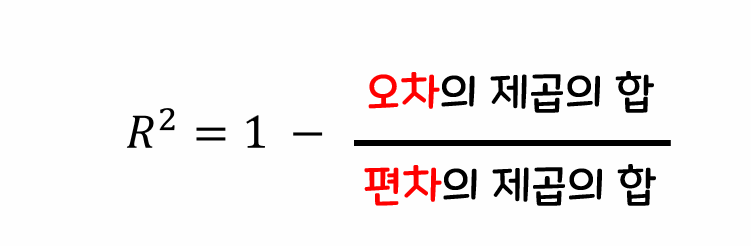

In [75]:
linear_model.score(X_train, y_train)

0.7611598772034454

In [79]:
linear_model.score(X_test,y_test)

# R2 score
# 0.7이상 : 좋은 모델
# 0.5이상 : 조정 필요

0.6771696999851695

### 선형회귀 모델 데이터 특성 확장
- 선형회귀 모델은 데이터의 분포가 직선의 형태를 많이 벗어나게 되면 예측 정확도가 낮아짐
- 선형회귀 모델은 모델 튜닝을 위한 하이퍼파라미터가 존재하지 않음
- 특성확장을 통해 성능을 높여보자

In [82]:
# copy : 기존의 데이터는 그대로 두면서, 복사하여 새로운 변수명에 넣어줌
# copy없이 X_train을 새로운 변수에 담아준다면, 변수의 내용이 바뀔 경우 기존 X_trian도 바뀔 수 있음

extended_X_train = X_train.copy()

In [84]:
extended_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666,20.2,393.07,7.74
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2,396.90,5.39
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277,18.6,394.87,10.97


In [88]:
for col1 in X_train.columns: # 13번 반복
    for col2 in X_train.columns : # 13번 반복
        extended_X_train[col1+'x'+col2] = X_train[col1] * X_train[col2] # 169번 새로운 열 추가

C:\Users\1\AppData\Local\Temp\ipykernel_7884\4138544686.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_X_train[col1+'x'+col2] = X_train[col1] * X_train[col2] # 169번 새로운 열 추가
C:\Users\1\AppData\Local\Temp\ipykernel_7884\4138544686.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_X_train[col1+'x'+col2] = X_train[col1] * X_train[col2] # 169번 새로운 열 추가
C:\Users\1\AppData\Local\Temp\ipykernel_7884\4138544686.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

In [90]:
extended_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,...,0.0,17.74520,154.88682,2273.304,47.669842,575.52,15970.68,484.396,1032.5788,575.0404
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,...,0.0,14.61208,133.27336,1680.712,41.654112,516.48,14332.32,434.704,2081.6296,463.1104
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666,...,0.0,4.11768,52.24500,579.726,25.787358,185.76,5154.84,156.348,3042.3618,59.9076
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,...,0.0,1.93843,34.86769,105.339,41.830646,24.05,1087.06,86.099,1904.4233,23.1361
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,...,0.0,10.99854,98.49924,1674.162,32.885454,72.24,12840.66,363.006,7135.3254,326.1636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,...,0.0,8.73334,91.58772,1195.404,53.117582,359.52,9976.68,302.596,5882.3464,224.4004
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,...,0.0,2.35543,38.72715,209.671,24.614513,26.95,2145.22,81.928,2139.2910,29.0521
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,...,0.0,10.29600,99.79200,506.880,49.255360,105.60,6881.60,337.920,6921.9040,309.7600
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277,...,0.0,5.36433,69.39622,575.925,47.773253,43.88,3038.69,204.042,4331.7239,120.3409


In [92]:
extended_X_test = X_test.copy()

In [94]:
for col1 in X_test.columns: # 13번 반복
    for col2 in X_test.columns : # 13번 반복
        extended_X_test[col1+'x'+col2] = X_test[col1] * X_test[col2] # 169번 새로운 열 추가

C:\Users\1\AppData\Local\Temp\ipykernel_7884\3714626836.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_X_test[col1+'x'+col2] = X_test[col1] * X_test[col2] # 169번 새로운 열 추가
C:\Users\1\AppData\Local\Temp\ipykernel_7884\3714626836.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_X_test[col1+'x'+col2] = X_test[col1] * X_test[col2] # 169번 새로운 열 추가
C:\Users\1\AppData\Local\Temp\ipykernel_7884\3714626836.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

In [96]:
extended_X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,...,0.00,1.57752,25.16520,270.745,10.065141,25.04,960.91,54.462,1212.4994,9.7969
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,...,0.00,1.93170,31.16100,109.980,24.048490,18.80,1151.50,90.240,1865.4300,22.0900
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,...,0.00,4.30809,56.53377,582.341,27.243163,17.62,2378.70,156.818,3455.1058,77.6161
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,...,0.00,23.22636,170.58162,3477.000,40.826934,834.48,23156.82,702.354,13800.2130,1208.9529
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,...,6.58,3.05312,50.60678,340.844,28.731570,19.74,1467.34,122.388,2571.2666,43.2964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284,...,0.00,5.95695,75.49415,870.530,95.014010,105.20,3734.60,259.055,5195.6965,172.9225
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,...,0.00,6.38040,79.43598,1191.417,29.851683,61.35,4711.68,256.443,4849.5948,150.5529
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358,...,0.00,1.98800,31.53465,99.897,38.904166,24.85,1779.26,73.556,1830.1528,24.7009
138,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,...,0.00,13.30368,124.87124,2093.624,35.574552,85.28,9316.84,451.984,8358.2928,454.5424


In [98]:
# 특성 확장된 train 데이터로 학습
linear_model2 = LinearRegression()
linear_model2.fit(extended_X_train,y_train)

LinearRegression()

In [100]:
linear_model2.score(extended_X_train,y_train)

0.9332471683804472

In [102]:
linear_model2.score(extended_X_test, y_test) # 특성 확장전 : 0.67

0.8093536759487533

### 라쏘(Lasso) 모델 적용

In [107]:
from sklearn.linear_model import Lasso

In [109]:
# alpha 값이 높아지면, 규제가 강해지면서 과대적합은 줄어듬, 오차는 커질 수 있음.
lasso_model = Lasso() # 알파의 default값 : 1

In [111]:
lasso_model.fit(extended_X_train, y_train)

C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.900e+03, tolerance: 2.826e+00
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [117]:
sum(lasso_model.coef_ !=0)
# 182개의 특성 중 94개의 특성이 남았다

94

In [119]:
lasso_model.score(extended_X_train,y_train) # 선형회귀 0.93

0.8804239058511475

In [123]:
lasso_model.score(extended_X_test,y_test) # 선형회귀 0.81

0.8390880939300641

- train에서 r2는 내려갔지만, test에서는 오름
- 선형회귀 모델에 비해, 과대적합이 줄어든 것을 확인할 수 있다!

### 릿지(Ridge) 모델 적용

In [127]:
from sklearn.linear_model import Ridge

In [131]:
ridge_model = Ridge(alpha = 1)

In [133]:
ridge_model.fit(extended_X_train, y_train)

Ridge(alpha=1)

In [135]:
ridge_model.score(extended_X_train, y_train) # 라쏘 0.88

0.9290610763449758

In [137]:
ridge_model.score(extended_X_test,y_test) # 라쏘 0.84

0.8125837987008401

- alpha값이 1일 때, 릿지모델에 비해 라쏘모델이 과대적합 해소에는 더 적합하다

### 하이퍼파라미터 튜닝
- alpha 값을 바꿔가며 RMSE를 확인

In [174]:
# Lasso 모델
# alpha값에 따라 RMSE 계산값을 빈 리스트에 담아주기
alpha_list = [0.001,0.01,0.1,1,10,100]
lasso_train_list = []
lasso_test_list = []

for i in alpha_list:
    # alpha값을 변경하면서 Lasso모델 불러오기
    lasso_model = Lasso(alpha = i)
    lasso_model.fit(extended_X_train,y_train)

    # 예측값 구하기
    lasso_train_pre = lasso_model.predict(extended_X_train)
    # 예측값과 정답(실제값)을 이용해서 RMSE 추출
    lasso_train_RMSE = mean_squared_error(lasso_train_pre,y_train)**0.5
    # 빈 리스트에 RMSE 값 넣기
    lasso_train_list.append(lasso_train_RMSE)

    # test 데이터도 동일하게
    # 예측값 구하기
    lasso_test_pre = lasso_model.predict(extended_X_test)
    # 예측값과 정답(실제값)을 이용해서 RMSE 추출
    lasso_test_RMSE = mean_squared_error(lasso_test_pre,y_test)**0.5
    # 빈 리스트에 RMSE 값 넣기
    lasso_test_list.append(lasso_test_RMSE)

C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+03, tolerance: 2.826e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.251e+03, tolerance: 2.826e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.541e+03, tolerance: 2.826e+00

In [184]:
lasso_test_list

[4.221458972433112,
 4.243935779449194,
 3.8032211559519307,
 3.911606675270054,
 4.232941390735931,
 5.188098568923207]

In [186]:
lasso_train_list

[2.5074101228840613,
 2.5518594174521247,
 2.8090648633104824,
 3.0897618279257983,
 3.4310530199513907,
 4.072947845655064]

In [157]:
# 한글을 쓰기 위한 rc import
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

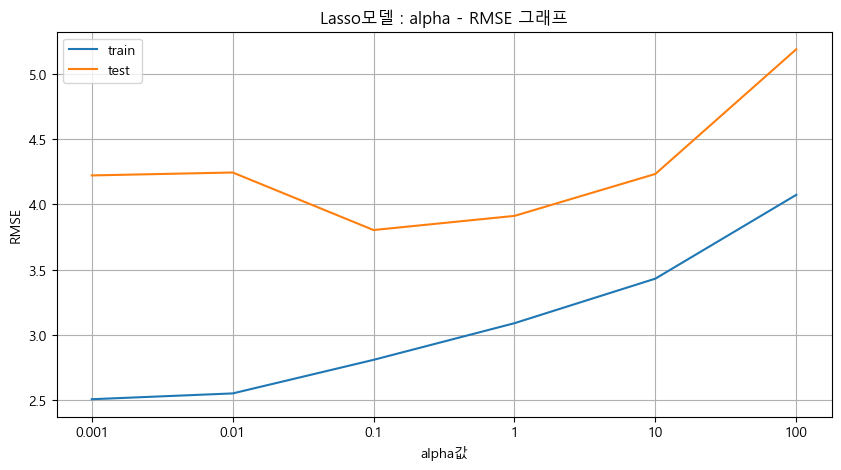

In [178]:
plt.figure(figsize=(10,5))
plt.plot(lasso_train_list, label='train') # train 그래프
plt.plot(lasso_test_list, label='test') # test 그래프
plt.title('Lasso모델 : alpha - RMSE 그래프') # 그래프 제목
plt.xlabel('alpha값') # x축 라벨
plt.xticks(np.arange(6), alpha_list) # x축 tick값(x축 값 개수, 실제 들어갈 값)
plt.ylabel('RMSE') # y축 라벨
plt.legend()
plt.grid()
plt.show()

In [180]:
# Ridge 모델
# alpha값에 따라 RMSE 계산값을 빈 리스트에 담아주기
alpha_list = [0.001,0.01,0.1,1,10,100]
ridge_train_list = []
ridge_test_list = []

for i in alpha_list:
    # alpha값을 변경하면서 Ridge모델 불러오기
    ridge_model = Ridge(alpha = i)
    ridge_model.fit(extended_X_train,y_train)

    # 예측값 구하기
    ridge_train_pre = ridge_model.predict(extended_X_train)
    # 예측값과 정답(실제값)을 이용해서 RMSE 추출
    ridge_train_RMSE = mean_squared_error(ridge_train_pre,y_train)**0.5
    # 빈 리스트에 RMSE 값 넣기
    ridge_train_list.append(ridge_train_RMSE)

    # test 데이터도 동일하게
    # 예측값 구하기
    ridge_test_pre = ridge_model.predict(extended_X_test)
    # 예측값과 정답(실제값)을 이용해서 RMSE 추출
    ridge_test_RMSE = mean_squared_error(ridge_test_pre,y_test)**0.5
    # 빈 리스트에 RMSE 값 넣기
    ridge_test_list.append(ridge_test_RMSE)

C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.53066e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


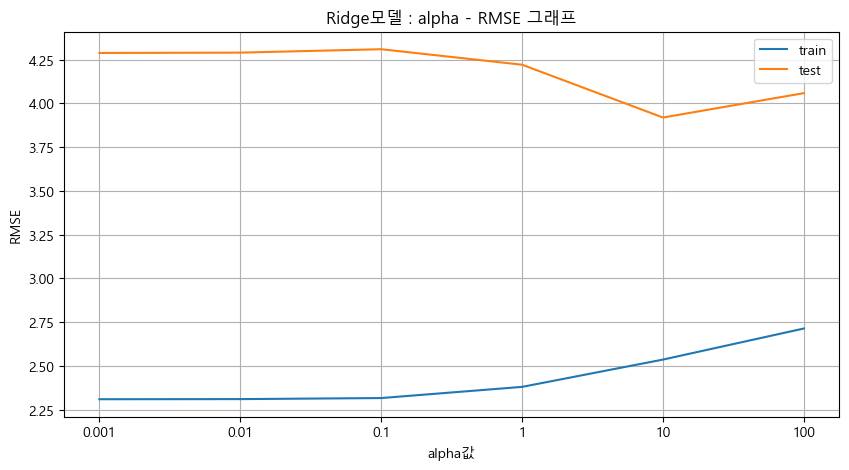

In [182]:
plt.figure(figsize=(10,5))
plt.plot(ridge_train_list, label='train') # train 그래프
plt.plot(ridge_test_list, label='test') # test 그래프
plt.title('Ridge모델 : alpha - RMSE 그래프') # 그래프 제목
plt.xlabel('alpha값') # x축 라벨
plt.xticks(np.arange(6), alpha_list) # x축 tick값(x축 값 개수, 실제 들어갈 값)
plt.ylabel('RMSE') # y축 라벨
plt.legend()
plt.grid()
plt.show()

In [190]:
ridge_train_list

[2.309227887094448,
 2.30984859941756,
 2.315921640938038,
 2.3798255293210846,
 2.5358912574285775,
 2.713568925000147]

In [188]:
ridge_test_list

[4.288685364429773,
 4.290645961690586,
 4.310098699472724,
 4.221479206749477,
 3.91964219553645,
 4.059120371849636]

- Lasso 모델과 Ridge 모델 모두 alpha값이 10일 때 가장 과대적합 제어에 유리한것을 볼 수 있음
- Lasso 모델은 Ridge 모델에 비해, 과대적합 제어가 더 잘된것을 확인
- 과대적합 제어를 위해서는 Lasso를 사용하는 것이 유리하다.
- 그러나 규제의 정도에 따라 Lasso모델은 오차값이 급격하게 증가함을 확인
- 모델의 정확한 예측(r2 score)면에서는 Ridge모델이 더 유리하다.